In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data into a DataFrame
df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', 
                     parse_dates=True)

# Use the dtypes attribute to check what types are in each column
# the word 'object' is used to denote a string
print(df.dtypes)

df.head()

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%


In [3]:
df["Price"] = pd.to_numeric(df['Price'].str.replace(',',''))
df["Open"] = pd.to_numeric(df['Open'].str.replace(',',''))
df["High"] = pd.to_numeric(df['High'].str.replace(',',''))
df["Low"] = pd.to_numeric(df['Low'].str.replace(',',''))
df["Change %"] = pd.to_numeric(df['Change %'].str.replace('%',''))

In [4]:
df

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
...,...,...,...,...,...
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94


In [12]:
data = df.sort_values('Date').query("Date >= 2015 and Date < 2017")[['High','Low']]

<AxesSubplot:xlabel='Date'>

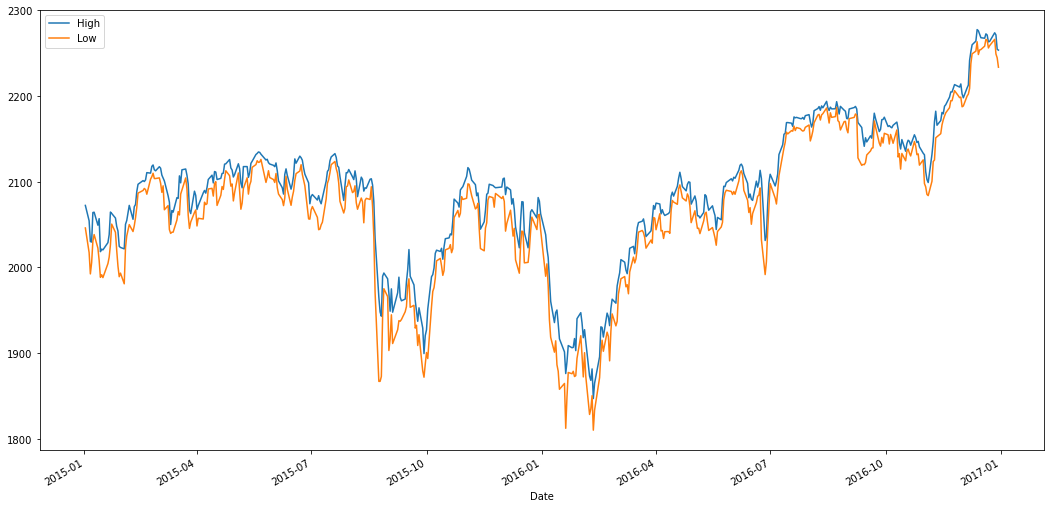

In [14]:
data.plot(figsize=(18,9))

<AxesSubplot:xlabel='Date'>

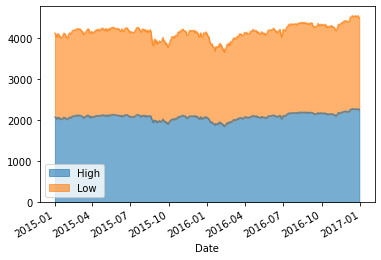

In [17]:
data.plot.area(alpha=0.6)

In [21]:
byMonth = pd.Grouper(freq='BM')

funcs = ['max','min', 'mean']
data2 = data.groupby(byMonth).agg(funcs)
data2

High                            Low                      
                max      min         mean      max      min         mean
Date                                                                    
2015-01-30  2072.36  2018.40  2043.618500  2050.54  1988.12  2013.377500
2015-02-27  2119.59  2021.66  2086.168947  2109.89  1980.90  2069.651053
2015-03-31  2117.52  2050.08  2090.510000  2104.50  2039.69  2069.787273
2015-04-30  2125.92  2067.63  2102.734286  2112.80  2048.38  2085.031429
2015-05-29  2134.72  2092.90  2119.615000  2126.06  2067.93  2103.135000
2015-06-30  2129.87  2074.28  2109.400455  2119.89  2056.32  2092.077273
2015-07-31  2132.82  2074.28  2102.516818  2123.65  2044.02  2083.963636
2015-08-31  2112.66  1943.09  2058.501905  2095.27  1867.01  2024.972381
2015-09-30  2020.86  1899.48  1962.428095  1986.73  1871.91  1929.715714
2015-10-30  2094.32  1927.21  2030.578636  2082.63  1893.70  2009.497727
2015-11-30  2116.48  2044.64  2089.545500  2097.51  2019.39  2070.573000
2015-12-31  2104.27  2022.90  2067.892273  2082.93  1993.26  2041.347273
2016-01-29  2038.20  1876.18  1939.557895  2004.17  1812.29  1898.273158
2016-02-29  1962.96  1847.00  1917.261000  1945.78  1810.10  1887.279500
2016-03-31  2072.21  1978.35  2027.080000  2058.27  1937.09  2008.560909
2016-04-29  2111.05  2060.63  2083.424762  2096.32  2033.80  2065.265238
2016-05-31  2103.48  2044.21  2073.309524  2090.06  2025.91  2055.414286
2016-06-30  2120.55  2031.45  2093.831818  2112.71  1991.68  2072.063636
2016-07-29  2177.09  2095.05  2153.438500  2164.89  2074.02  2139.559500
2016-08-31  2193.81  2163.79  2182.671739  2186.80  2147.58  2171.063478
2016-09-30  2187.87  2141.33  2166.813333  2179.07  2119.12  2147.269048
2016-10-31  2169.60  2133.25  2151.324286  2160.39  2114.72  2137.057143
2016-11-30  2214.10  2099.07  2171.841429  2206.27  2083.79  2154.512381
2016-12-30  2277.53  2197.95  2253.583333  2266.15  2187.44  2240.177143

<AxesSubplot:xlabel='Date'>

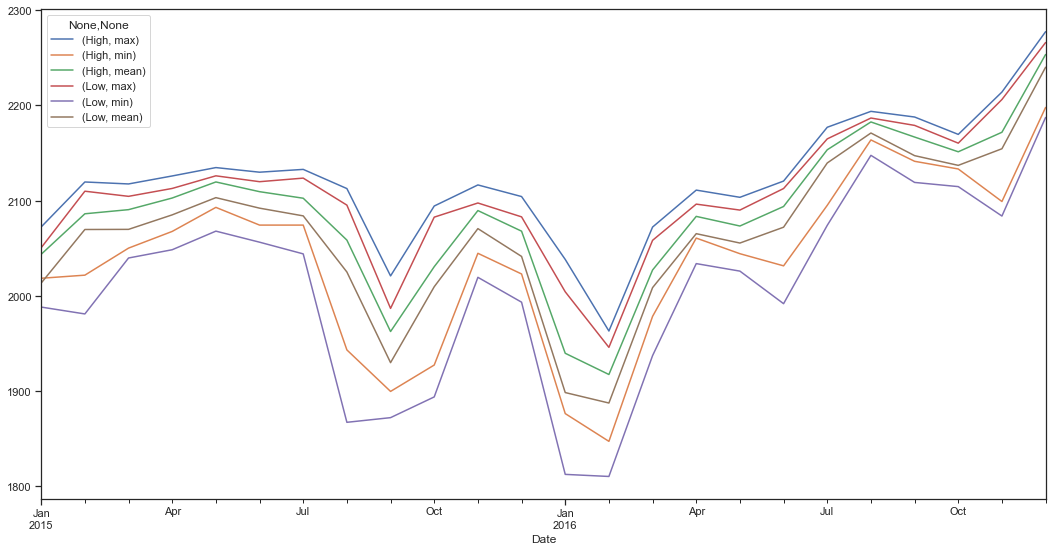

In [35]:
data2.plot(figsize=(18,9))